In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                           recall_score, f1_score, roc_curve, auc)
from sklearn.ensemble import RandomForestClassifier



In [8]:
def calcular_metricas_basicas(y_true, y_pred):
    """
    Calcula as métricas básicas de avaliação.

    Args:
        y_true: Valores verdadeiros
        y_pred: Valores preditos

    Returns:
        dict: Dicionário com as métricas calculadas
    """
    # Calcula a matriz de confusão
    cm = confusion_matrix(y_true, y_pred)

    # Para caso binário
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()

        # Calcula especificidade (true negative rate)
        especificidade = tn / (tn + fp)

        metricas = {
            'Acurácia': accuracy_score(y_true, y_pred),
            'Sensibilidade (Recall)': recall_score(y_true, y_pred, average='weighted'),
            'Especificidade': especificidade,
            'Precisão': precision_score(y_true, y_pred, average='weighted'),
            'F1-Score': f1_score(y_true, y_pred, average='weighted')
        }
    else:
        # Para caso multiclasse
        metricas = {
            'Acurácia': accuracy_score(y_true, y_pred),
            'Sensibilidade (Recall)': recall_score(y_true, y_pred, average='weighted'),
            'Precisão': precision_score(y_true, y_pred, average='weighted'),
            'F1-Score': f1_score(y_true, y_pred, average='weighted')
        }

    return metricas

def plot_confusion_matrix(y_true, y_pred, labels=None):
    """
    Plota a matriz de confusão com anotações.

    Args:
        y_true: Arrays com os valores verdadeiros
        y_pred: Arrays com os valores preditos
        labels: Lista com os nomes das classes
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm,
                annot=True,
                fmt='d',
                cmap='Blues',
                xticklabels=labels if labels else 'auto',
                yticklabels=labels if labels else 'auto')

    plt.title('Matriz de Confusão', pad=20)
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.tight_layout()

def plot_roc_curve(y_true, y_pred_proba, n_classes):
    """
    Plota a curva ROC para cada classe.

    Args:
        y_true: Valores verdadeiros
        y_pred_proba: Probabilidades preditas
        n_classes: Número de classes
    """
    plt.figure(figsize=(10, 8))

    if n_classes == 2:
        # Caso binário
        fpr, tpr, _ = roc_curve(y_true, y_pred_proba[:, 1])
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    else:
        # Caso multiclasse - One vs Rest
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_true == i, y_pred_proba[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'ROC classe {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # linha diagonal
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.grid(True)

def exibir_resultados(metricas):
    """
    Exibe as métricas calculadas de forma organizada.

    Args:
        metricas: Dicionário com as métricas
    """
    print("\n=== Métricas de Avaliação ===")
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor:.4f}")

In [10]:
# Gera dados de exemplo
X, y = make_classification(n_samples=1000,
                          n_classes=3,
                          n_features=20,
                          n_informative=15,
                          random_state=42)

# Divide os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treina o modelo
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Faz as predições
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

# Define os nomes das classes
class_names = ['Classe 0', 'Classe 1', 'Classe 2']

# Calcula e exibe todas as métricas
metricas = calcular_metricas_basicas(y_test, y_pred)
exibir_resultados(metricas)


=== Métricas de Avaliação ===
Acurácia: 0.7667
Sensibilidade (Recall): 0.7667
Precisão: 0.7678
F1-Score: 0.7670


<Figure size 640x480 with 0 Axes>

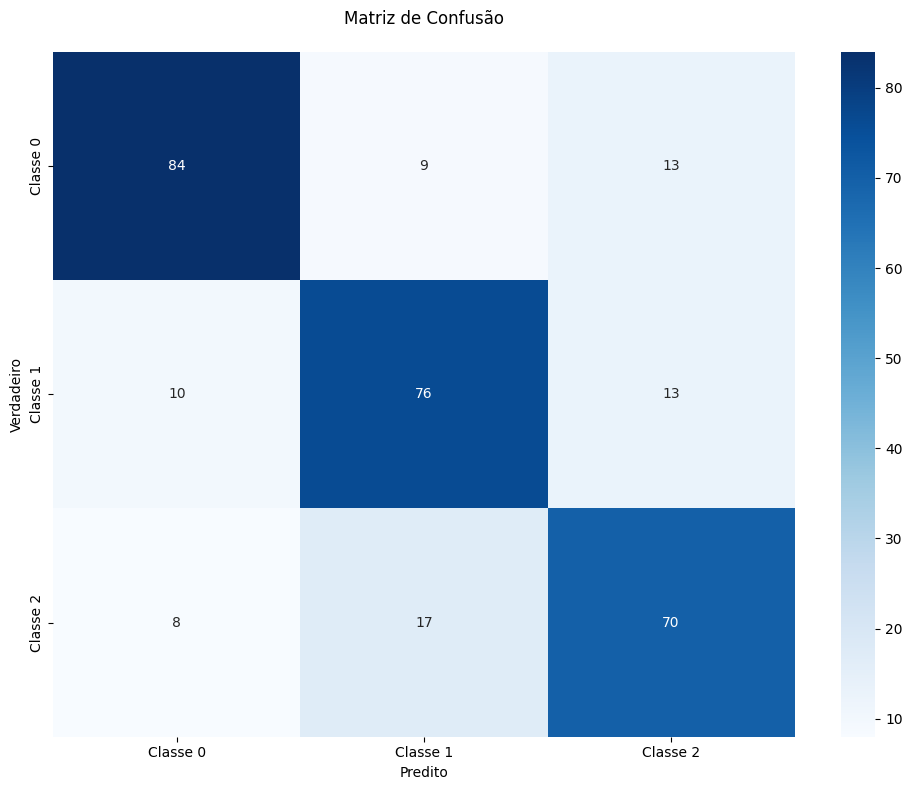

In [11]:
# Plota a matriz de confusão
plt.figure(1)
plot_confusion_matrix(y_test, y_pred, labels=class_names)

<Figure size 640x480 with 0 Axes>

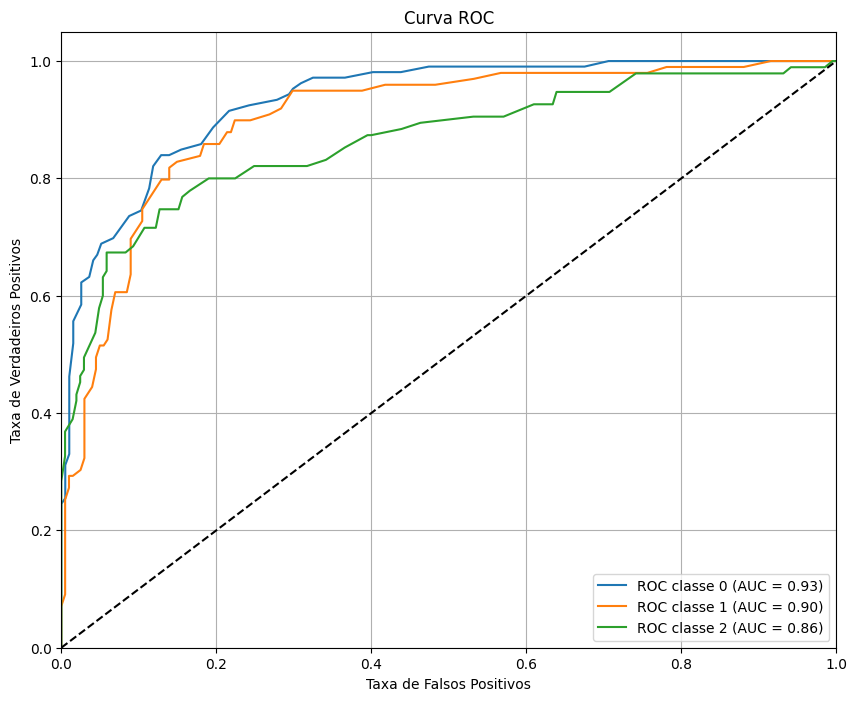

In [12]:
# Plota a curva ROC
plt.figure(2)
plot_roc_curve(y_test, y_pred_proba, n_classes=3)

plt.show()